# The Bayes Optimal Decision Boundary for a Mixture of Gaussians

In the textbook *Elements of Statistical Learning* by Jerome Friedman, Trevor Hastie, and Rob Tibshirani ([ESL textbook](https://web.stanford.edu/~hastie/ElemStatLearn/), there is a classification example in Chapter 2 where the data is generated from a mixture of Gaussians. This notebook will generate the data and similar scatterplots to those in the textbook. The plots will also include the decision boundary found by fitting a Naive Bayes Classifier and the Bayes Optimal Decision Boundary. 

I have completed the online course taught by Trevor Hastie and Rob Tibshirani which is based on their less technical textbook *An Introduction to Statistical Learning with Applications in R* and I highly recommend the course. The course is available for free online through Stanford at [ISLR course](https://online.stanford.edu/courses/sohs-ystatslearning-statistical-learning) and the textbook is available for free as well at [ISLR textbook](http://faculty.marshall.usc.edu/gareth-james/ISL/). The textbook introduces the reader to using R. However, it seems that Python is currently the language of choice for those interested in data science and machine learning, so I am adapting some of the examples in their text to Python. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as mvn
%matplotlib inline

## Generating the simulated data from a mixture of Gaussians
We will generate the data using the same method as in the textbook. However, I have switched the colors used to define the two classes (we will use red and blue). First, we generate 10 means $\mu^R_1, \mu^R_2, \cdots , \mu^R_{10}$ from $N(\mathbf{x} |(1,0)^T, I)$ for the red class and 10 means $\mu^B_1, \mu^B_2, \cdots , \mu^B_{10}$ from $N(\mathbf{x} |(0,1)^T, I)$ for the blue class.

In [2]:
random_mean_red = mvn([1,0],np.eye(2) ,size=10)
random_mean_blue = mvn([0,1],np.eye(2), size=10)

Next, we generate 100 observations from the red class as follows. First, we randomly select a $\mu^R_i$ with probability 1/10 from the collection of 10 means for the red class. Then, we generate a single observation from $N(\mu^R_i, \Sigma)$. The red class conditional density is given by $$ P(\mathbf{x} |\text{Red}) = \displaystyle\sum_{i=1}^{10} \frac{1}{10} N(\mathbf{x} | \mu^R_i , \Sigma)$$
a mixture of Gaussian clusters. All Gaussians in the mixture have the same covariance matrix $\Sigma = \begin{bmatrix} 1/5 & 0 \\ 0 & 1/5 \end{bmatrix}$. The same method is used to generate 100 observations from the blue class where all Gaussians again have the same covariance matrix $\Sigma$. We also generate a test set to compare the performance of the Gaussian Naive Bayes Classifier, the Nearest Neighbor Classifier, and the classifier using the optimal decision boundary. 

In [3]:
covar_matrix = (1/5)*np.eye(2)
R = []
for i in range(0,100):
    r = np.random.randint(0,10) # randomly pick an index for the list of means for red class
    R.append(mvn(random_mean_red[r],covar_matrix)) # use randomly chosen mean to generate a single observation
reds = np.array(R)
R_test = []
for i in range(0,100):
    r = np.random.randint(0,10)
    R_test.append(mvn(random_mean_red[r],covar_matrix))
reds_test = np.array(R_test)

In [4]:
B = []
for i in range(0,100):
    r = np.random.randint(0,10)
    B.append(mvn(random_mean_blue[r],covar_matrix))
blues = np.array(B)
B_test = []
for i in range(0,100):
    r = np.random.randint(0,10)
    B_test.append(mvn(random_mean_blue[r],covar_matrix))
blues_test = np.array(B_test)

In [5]:
# collect all the observations into a single array to feed into classifiers
X = np.concatenate([reds,blues])
y = np.zeros(200)
y[100:] = 1 # encode red as 0, blue as 1
X_test = np.concatenate([reds_test,blues_test])
y_test = np.zeros(200)
y_test[100:] = 1

## Scatterplot of the data

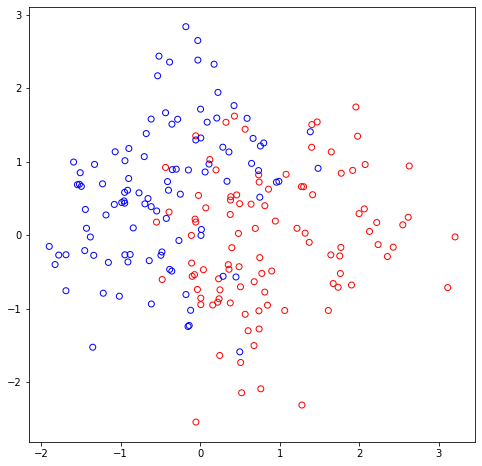

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x=reds[:,0], y=reds[:,1],facecolors= 'none', edgecolors='red')
plt.scatter(x=blues[:,0], y=blues[:,1],facecolors= 'none', edgecolors='blue')
plt.show()
plt.close()

## Optimal Decision Boundary
The *Bayes Classifier* is $$\hat{G}(x) = \mathscr{G}_k \text{ if } P(\mathscr{G}_k|X=x) =  \underset{g \in \mathscr{G}}{\text{max}} P(g|X=x)$$ where $\mathscr{G}$ is the set of classes. That is, an observation $\mathbf{x}$ is classified to the most probable class. In our two class example, the decision boundary is the set of value $\mathbf{x}$ that satisfy $$P(\text{Red} | X=x) = P(\text{Blue} | X=x)$$. Applying Bayes Rule, 

$$P(\text{Red} | X=x) = \frac{P(\text{Red}) \cdot P(X=x|\text{Red})}{P(\text{Red}) \cdot P(X=x|\text{Red}) + P(\text{Blue}) \cdot P(X=x|\text{Blue})}$$ 

and

$$P(\text{Blue} | X=x) = \frac{P(\text{Blue}) \cdot P(X=x|\text{Blue})}{P(\text{Red}) \cdot P(X=x|\text{Red}) + P(\text{Blue}) \cdot P(X=x|\text{Blue})}$$

Setting these two equations equal to each other, notice that we can cancel the denominators from both sides. Since we have generated an equal number of Red and Blue observations, let's assume that $P(\text{Red}) = P(\text{Blue}) = 1/2$. After simplifying, we are left with 

$$P(X=x|\text{Red}) = P(X=x|\text{Blue})$$

This provides a classification rule: if $P(X=x|\text{Blue}) - P(X=x|\text{Red}) >0$, then classify to Blue. Otherwise, classify as Red. We can plot this decision boundary by generating a contour plot of $P(X=x|\text{Blue}) - P(X=x|\text{Red})$ at level 0. Let's take a closer look at $P(X=x|\text{Red})= P(X=x|\text{Blue})$ so we can generate the contour plot. First note that we can cancel the $\frac{1}{10}$ from both sides. Now consider each term in the sum.

$$N(\mathbf{x} | \mu_i^R , \Sigma) = \frac{1}{2\pi |\Sigma|^{1/2}} \text{exp}\left(\frac{-1}{2}(\mathbf{x} - \mu_i^R)^T \Sigma^{-1} (\mathbf{x} - \mu_i^R)\right)$$

All terms, on both sides of the equation, have the same normalization coefficient, so these can be cancelled out. Furthermore, since $\Sigma = \begin{bmatrix} 1/5 & 0 \\ 0 & 1/5 \end{bmatrix}$, $\Sigma^{-1} = \begin{bmatrix} 5 & 0 \\ 0 & 5 \end{bmatrix} = 5 \cdot I$.  Thus, we have

$$\displaystyle\sum_{i=1}^{10} \text{exp}\left(\frac{-5}{2}(\mathbf{x} - \mu_i^R)^T (\mathbf{x} - \mu_i^R)\right) = \displaystyle\sum_{i=1}^{10} \text{exp}\left(\frac{-5}{2}(\mathbf{x} - \mu_i^B)^T (\mathbf{x} - \mu_i^B)\right)$$

The code below creates a grid of values on which to evaluate 

$$\displaystyle\sum_{i=1}^{10} \text{exp}\left(\frac{-5}{2}(\mathbf{x} - \mu_i^B)^T (\mathbf{x} - \mu_i^B)\right) - \displaystyle\sum_{i=1}^{10} \text{exp}\left(\frac{-5}{2}(\mathbf{x} - \mu_i^R)^T (\mathbf{x} - \mu_i^R)\right)$$

and plots the $0$ contour.


In [7]:
# create a grid of values
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0])-1.0, np.max(X[:,0])+1.0, 100),
                     np.linspace(np.min(X[:,1])-1.0, np.max(X[:,1])+1.0, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
decisions = [] # store the results of the classification rule function
for i in range(grid.shape[0]):
    e_red, e_blue = [], []
    for j in range(10):
        e_blue.append(np.exp(-2.5*(grid[i]-random_mean_blue[j]).dot(grid[i]-random_mean_blue[j])))
        e_red.append(np.exp(-2.5*(grid[i]-random_mean_red[j]).dot(grid[i]-random_mean_red[j])))
    sum_e_blue = np.array(e_blue).sum()
    sum_e_red = np.array(e_red).sum()
    decisions.append(sum_e_blue-sum_e_red) 
decisions = np.array(decisions)
decisions = decisions.reshape(xx.shape)

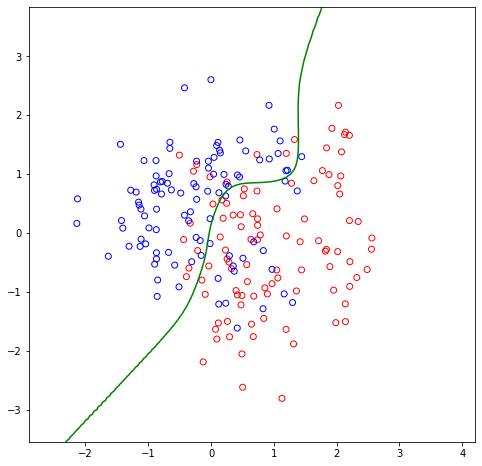

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x=reds_test[:,0], y=reds_test[:,1],facecolors= 'none', edgecolors='red')
plt.scatter(x=blues_test[:,0], y=blues_test[:,1],facecolors= 'none', edgecolors='blue')
plt.contour(xx, yy, decisions, levels=[0.0], colors='green')
plt.show()
plt.close()

Let's find the test error using this classification rule so we can compare its performance to other classifiers.

In [9]:
from sklearn.metrics import accuracy_score
test_decisions = [] # store the results of the classification rule function
for i in range(X_test.shape[0]):
    e_red, e_blue = [], []
    for j in range(10):
        e_blue.append(np.exp(-2.5*(X_test[i]-random_mean_blue[j]).dot(X_test[i]-random_mean_blue[j])))
        e_red.append(np.exp(-2.5*(X_test[i]-random_mean_red[j]).dot(X_test[i]-random_mean_red[j])))
    sum_e_blue = np.array(e_blue).sum()
    sum_e_red = np.array(e_red).sum()
    test_decisions.append(sum_e_blue-sum_e_red) 
test_decisions = np.array(test_decisions) # contains values of classification rule for all test data
optimal_preds = np.zeros(200) # create an array of all zeros
optimal_preds[test_decisions>0.0]=1 # using classification rule, change red (0) to blue (1)
print('The test error using the optimal decision boundary is', 1 - accuracy_score(optimal_preds, y_test))

The test error using the optimal decision boundary is 0.16500000000000004


## Gaussian Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
NB = GaussianNB().fit(X,y)
print('The training error for GNB is', 1-accuracy_score(y, NB.predict(X)))
print('The test error for GNB is', 1-accuracy_score(y_test, NB.predict(X_test)))

The training error for GNB is 0.17000000000000004
The test error for GNB is 0.19499999999999995


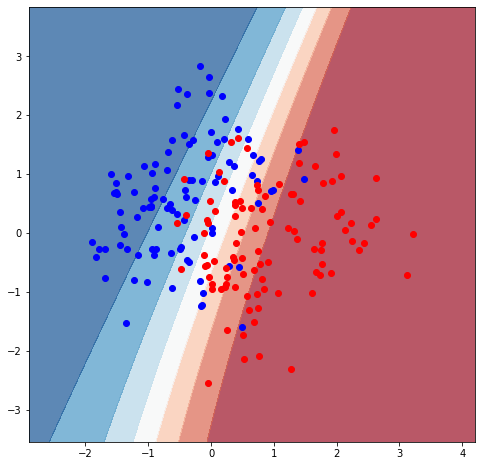

In [12]:
gnb_Z = NB.predict_proba(grid)
gnb_Z = gnb_Z[:, 1].reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.contourf(xx, yy, gnb_Z, alpha=0.7, cmap='RdBu')
plt.scatter(x=blues[:,0], y=blues[:,1], color='b')
plt.scatter(x=reds[:,0], y=reds[:,1], color='r')
plt.show()
plt.close()

The graph below shows both the optimal decision boundary and the Gaussian Naive Bayes decision boundary. 

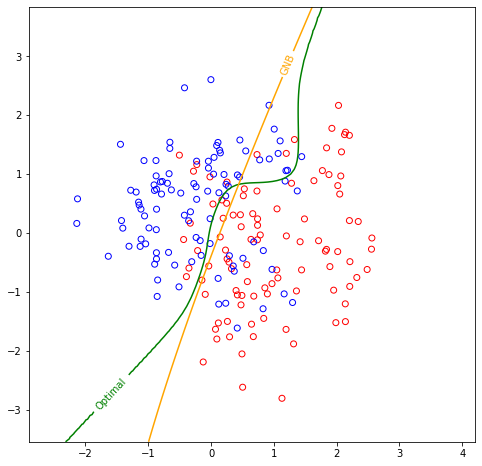

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
red_plot = ax.scatter(x=reds_test[:,0], y=reds_test[:,1],facecolors= 'none', edgecolors='red')
blue_plot = ax.scatter(x=blues_test[:,0], y=blues_test[:,1],facecolors= 'none', edgecolors='blue')
opt_contour = ax.contour(xx, yy, decisions, levels=[0.0], colors='green')
gnb_contour = ax.contour(xx, yy, gnb_Z, colors='orange', levels=[0.5])
ax.clabel(opt_contour, fmt={0.0: 'Optimal'})
ax.clabel(gnb_contour, fmt={0.5: 'GNB'})
plt.show()
plt.close()

## Nearest Neighbor Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X,y)
print('The training error for 1-NN is', 1-accuracy_score(y, knn.predict(X)))
print('The test error for 1-NN is', 1-accuracy_score(y_test, knn.predict(X_test)))

The training error for 1-NN is 0.0
The test error for 1-NN is 0.21999999999999997


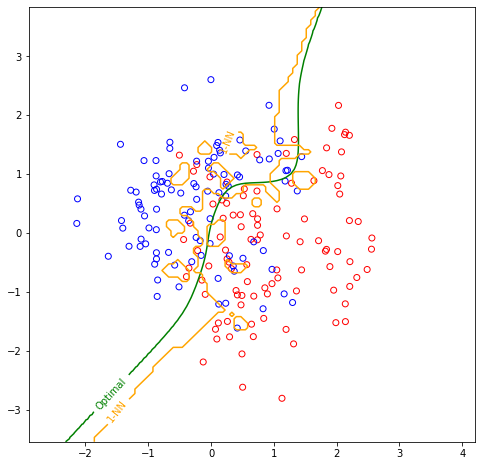

In [16]:
knn_Z = knn.predict_proba(grid)
knn_Z = knn_Z[:, 1].reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8,8))
red_plot = ax.scatter(x=reds_test[:,0], y=reds_test[:,1],facecolors= 'none', edgecolors='red')
blue_plot = ax.scatter(x=blues_test[:,0], y=blues_test[:,1],facecolors= 'none', edgecolors='blue')
opt_contour = ax.contour(xx, yy, decisions, levels=[0.0], colors='green')
knn_contour = ax.contour(xx, yy, knn_Z, colors='orange', levels=[0.5])
ax.clabel(opt_contour, fmt={0.0: 'Optimal'})
ax.clabel(knn_contour, fmt={0.5: '1-NN'})
plt.show()
plt.close()

The training error for 15-NN is 0.13
The test error for 15-NN is 0.18999999999999995


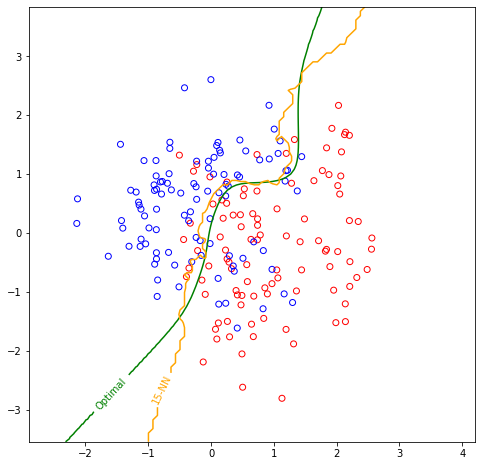

In [17]:
fifteen_nn = KNeighborsClassifier(n_neighbors=15).fit(X,y)
print('The training error for 15-NN is', 1-accuracy_score(y, fifteen_nn.predict(X)))
print('The test error for 15-NN is', 1-accuracy_score(y_test, fifteen_nn.predict(X_test)))
fifteen_nn_Z = fifteen_nn.predict_proba(grid)
fifteen_nn_Z = fifteen_nn_Z[:, 1].reshape(xx.shape)
fig, ax = plt.subplots(figsize=(8,8))
red_plot = ax.scatter(x=reds_test[:,0], y=reds_test[:,1],facecolors= 'none', edgecolors='red')
blue_plot = ax.scatter(x=blues_test[:,0], y=blues_test[:,1],facecolors= 'none', edgecolors='blue')
opt_contour = ax.contour(xx, yy, decisions, levels=[0.0], colors='green')
fifteen_nn_contour = ax.contour(xx, yy, fifteen_nn_Z, colors='orange', levels=[0.5])
ax.clabel(opt_contour, fmt={0.0: 'Optimal'})
ax.clabel(fifteen_nn_contour, fmt={0.5: '15-NN'})
plt.show()
plt.close()